In [2]:
import numpy as np
import pandas as pd
import nltk

In [3]:
#Loading Data
df_sen = pd.read_csv("exported_mz_review.csv")
df_sen.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,eeb3505c-1c2f-4061-abc9-9296acf8a81f,Owdessa The CeededOne,https://play-lh.googleusercontent.com/a-/ACNPE...,Love it,5,0,NaN,2022-11-22 10:25:35,NaN,NaN
1,d5acec3c-1228-4f73-b5c8-48fb35caf8c7,Balvinder Kaur,https://play-lh.googleusercontent.com/a/ALm5wu...,😠😠😤 I have ordered my first card like 20 days ...,1,0,5.1.0,2022-11-21 19:08:43,We’re really sorry to hear this Balvinder 😞 De...,2022-11-22 08:55:34
2,5ac6c032-b155-4224-9eff-d48872e5a7f0,Dankamihaylova Atanasova,https://play-lh.googleusercontent.com/a-/ACNPE...,Zdr blagodafe i za sico,5,0,NaN,2022-11-21 18:02:24,NaN,NaN
3,8821ecc4-1c83-4e22-987c-0849ef3e0cac,dominic learwood,https://play-lh.googleusercontent.com/a-/ACNPE...,Speaking about the app specifically there are ...,5,0,5.0.1,2022-11-21 16:29:34,NaN,NaN
4,41d939e4-f772-4b3f-9048-9b8b89ae09a5,James Mallinson,https://play-lh.googleusercontent.com/a/ALm5wu...,best bank,5,0,5.0.1,2022-11-21 16:05:49,NaN,NaN
5,829168bf-e532-40af-aebc-f8c247885a57,catalin laiu,https://play-lh.googleusercontent.com/a-/ACNPE...,Very fast and useful,5,0,5.1.0,2022-11-21 13:09:04,NaN,NaN
6,e5686193-cff3-4ffa-9c62-5dac7597e575,Hadrian,https://play-lh.googleusercontent.com/a/ALm5wu...,Excellent app 👌 recommended everything they of...,5,0,5.1.0,2022-11-21 10:22:12,NaN,NaN
7,39f4b145-fd13-44c9-a994-76ffc35baefb,Liudvikas Einingis,https://play-lh.googleusercontent.com/a/ALm5wu...,I've used this bank for 3years and they... Ban...,2,0,5.0.1,2022-11-20 22:37:58,Hey Liudvikas 👋 We're really sorry to hear wha...,2022-11-21 08:49:21
8,c7f1546c-4c95-4312-a21f-44915dc30f46,Guy Eatch,https://play-lh.googleusercontent.com/a-/ACNPE...,Best Internet banking,5,0,5.0.1,2022-11-20 17:53:58,NaN,NaN
9,60c1ce39-7a67-4c5d-a2f3-f16fa9fe24dc,Nick Stroebel,https://play-lh.googleusercontent.com/a-/ACNPE...,Got scammed by what seemed a legitimate car de...,1,0,5.0.1,2022-11-20 15:27:22,NaN,NaN


In [12]:
# Cleaning the text in the content column
# Define a function to clean the content
import re
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
df_sen['Cleaned Reviews'] = df_sen['content'].apply(clean)

df_sen['Cleaned Reviews'][100]

'how straightforward banking should be '

In [21]:
# Tokenization
text = df_sen['Cleaned Reviews'][30]
print (text)
tokens = nltk.word_tokenize(text)
pos = nltk.pos_tag(tokens)
pos

#pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

such a good app updated frequently easy to use 


[('such', 'JJ'),
 ('a', 'DT'),
 ('good', 'JJ'),
 ('app', 'NN'),
 ('updated', 'VBN'),
 ('frequently', 'RB'),
 ('easy', 'JJ'),
 ('to', 'TO'),
 ('use', 'VB')]

In [36]:
#Tokenization and Part of speech(POS) Tagging
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# creating POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_sen['POS tagged'] = df_sen['Cleaned Reviews'].apply(token_stop_pos)
#Printing only specific columns
df_sen_new = df_sen[['content', 'Cleaned Reviews', 'POS tagged']]


,content,Cleaned Reviews,POS tagged
0,Love it,Love it,"[(Love, v)]"
1,😠😠😤 I have ordered my first card like 20 days ...,I have ordered my first card like days ago Th...,"[(ordered, v), (first, a), (card, n), (like, N..."
2,Zdr blagodafe i za sico,Zdr blagodafe i za sico,"[(Zdr, n), (blagodafe, n), (za, v), (sico, n)]"
3,Speaking about the app specifically there are ...,Speaking about the app specifically there are ...,"[(Speaking, v), (app, n), (specifically, r), (..."
4,best bank,best bank,"[(best, a), (bank, n)]"
...,...,...,...
14781,It's a waiting list. Wow! Absolutely pointless...,It s a waiting list Wow Absolutely pointless a...,"[(waiting, v), (list, n), (Wow, n), (Absolutel..."
14782,Pretty disappointed to go from an email saying...,Pretty disappointed to go from an email saying...,"[(Pretty, r), (disappointed, a), (go, v), (ema..."
14783,On the waiting list. Looking forward to all th...,On the waiting list Looking forward to all the...,"[(waiting, v), (list, n), (Looking, v), (forwa..."
14784,Mondo for Android - can't wait. The iOS app i...,Mondo for Android can t wait The iOS app is fa...,"[(Mondo, n), (Android, n), (wait, v), (iOS, n)..."


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [40]:
#Lemmantization- To obtain the stop words

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df_sen_new['Lemma'] = df_sen['POS tagged'].apply(lemmatize)
df_sen_new.head()
# print(mydata['review'][239] + "\n" + mydata['Lemma'][239])

C:\Users\USER\AppData\Local\Temp\ipykernel_16840\3634139875.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sen_new['Lemma'] = df_sen['POS tagged'].apply(lemmatize)


,content,Cleaned Reviews,POS tagged,Lemma
0,Love it,Love it,"[(Love, v)]",Love
1,😠😠😤 I have ordered my first card like 20 days ...,I have ordered my first card like days ago Th...,"[(ordered, v), (first, a), (card, n), (like, N...",order first card like day ago card delivery ...
2,Zdr blagodafe i za sico,Zdr blagodafe i za sico,"[(Zdr, n), (blagodafe, n), (za, v), (sico, n)]",Zdr blagodafe za sico
3,Speaking about the app specifically there are ...,Speaking about the app specifically there are ...,"[(Speaking, v), (app, n), (specifically, r), (...",Speaking app specifically load great feature...
4,best bank,best bank,"[(best, a), (bank, n)]",best bank


In [41]:
df_sen_new[['content', 'Lemma']]

,content,Lemma
0,Love it,Love
1,😠😠😤 I have ordered my first card like 20 days ...,order first card like day ago card delivery ...
2,Zdr blagodafe i za sico,Zdr blagodafe za sico
3,Speaking about the app specifically there are ...,Speaking app specifically load great feature...
4,best bank,best bank
...,...,...
14781,It's a waiting list. Wow! Absolutely pointless...,wait list Wow Absolutely pointless stage
14782,Pretty disappointed to go from an email saying...,Pretty disappointed go email say first test ...
14783,On the waiting list. Looking forward to all th...,wait list Looking forward new feature come
14784,Mondo for Android - can't wait. The iOS app i...,Mondo Android wait iOS app fantastic Android...


In [43]:
#Sentiment analysis using TextBlob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

fin_data = pd.DataFrame(df_sen_new[['content', 'Lemma']])

# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity)
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,content,Lemma,Polarity,Analysis
0,Love it,Love,0.500000,Positive
1,😠😠😤 I have ordered my first card like 20 days ...,order first card like day ago card delivery ...,-0.016667,Negative
2,Zdr blagodafe i za sico,Zdr blagodafe za sico,0.000000,Neutral
3,Speaking about the app specifically there are ...,Speaking app specifically load great feature...,0.444444,Positive
4,best bank,best bank,1.000000,Positive


In [45]:
#Counting the sentiment polarity
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    11018
Neutral      2210
Negative     1558
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x2230d4a7ee0>,
 [Text(-0.7659117982913536, 0.7895436132590177, 'Positive'),
  Text(0.46771417689286726, -0.9956120975226386, 'Neutral'),
  Text(1.2767061235399213, -0.43877269071316083, 'Negative')],
 [Text(-0.41777007179528375, 0.43066015268673685, '74.5%'),
  Text(0.25511682375974576, -0.5430611441032573, '14.9%'),
  Text(0.8038520037103208, -0.27626428674532344, '10.5%')])

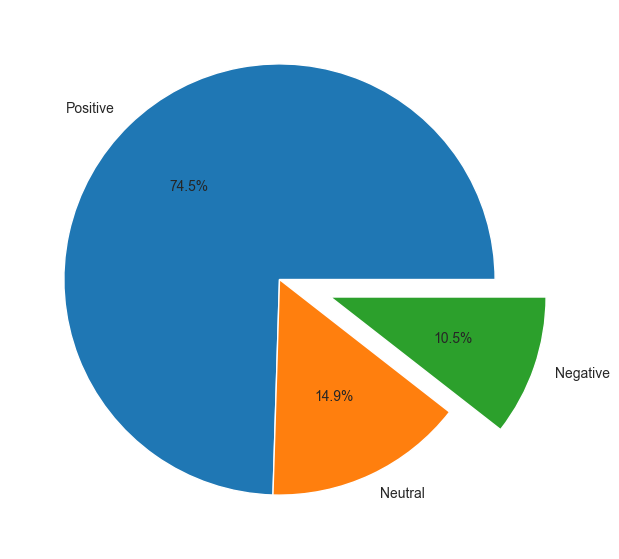

In [47]:
#Plotting the visuals

import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()

In [49]:
#Sentiment analysis using VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Love it,Love,0.500000,Positive,0.6369,Positive
1,😠😠😤 I have ordered my first card like 20 days ...,order first card like day ago card delivery ...,-0.016667,Negative,0.0516,Neutral
2,Zdr blagodafe i za sico,Zdr blagodafe za sico,0.000000,Neutral,0.0000,Neutral
3,Speaking about the app specifically there are ...,Speaking app specifically load great feature...,0.444444,Positive,0.9153,Positive
4,best bank,best bank,1.000000,Positive,0.6369,Positive


In [50]:
#Counting the sentiment polarity
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Positive    8446
Neutral     5554
Negative     786
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x2230f925220>,
 [Text(-0.2662437309791063, 1.170091567234943, 'Positive'),
  Text(0.06236896465243137, -1.0982304458756296, 'Neutral'),
  Text(1.084696250998942, -0.1828497827968093, 'Negative')],
 [Text(-0.1553088430711453, 0.6825534142203834, '57.1%'),
  Text(0.03401943526496256, -0.5990347886594342, '37.6%'),
  Text(0.5916525005448774, -0.09973624516189598, '5.3%')])

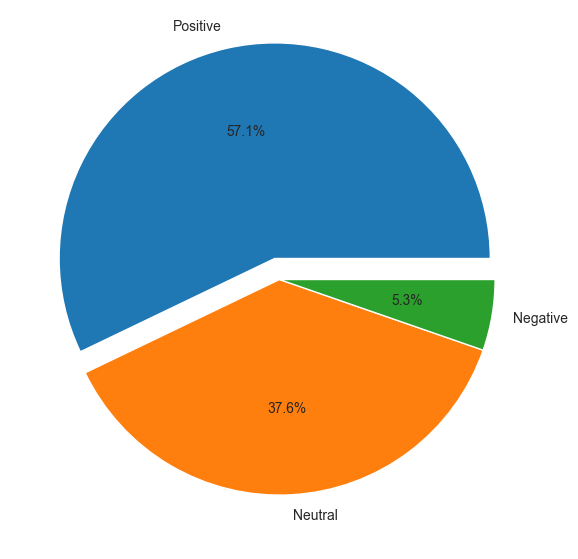

In [51]:
#Plotting the visuals

vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

In [52]:
#Sentiment Analysis using SentiWordNet

nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue

        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = df_sen['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\sentiwordnet.zip.


,content,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Love it,Love,0.500000,Positive,0.6369,Positive,Positive
1,😠😠😤 I have ordered my first card like 20 days ...,order first card like day ago card delivery ...,-0.016667,Negative,0.0516,Neutral,Negative
2,Zdr blagodafe i za sico,Zdr blagodafe za sico,0.000000,Neutral,0.0000,Neutral,0
3,Speaking about the app specifically there are ...,Speaking app specifically load great feature...,0.444444,Positive,0.9153,Positive,Positive
4,best bank,best bank,1.000000,Positive,0.6369,Positive,Positive


In [53]:
#Counting the sentiment polarity
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive    8990
Negative    2690
Neutral     2352
0            754
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x223182fdee0>,
 [Text(-0.39941029434566155, 1.1315791694665964, 'Positive'),
  Text(-0.3466689729899722, -1.0439447414332226, 'Negative'),
  Text(0.750332937744489, -0.8043634020364956, 'Neutral'),
  Text(1.0859144012206312, -0.1754705480177182, '0')],
 [Text(-0.23298933836830257, 0.6600878488555144, '60.8%'),
  Text(-0.18909216708543936, -0.5694244044181214, '18.2%'),
  Text(0.4092725114969939, -0.43874367383808843, '15.9%'),
  Text(0.5923169461203442, -0.09571120800966447, '5.1%')])

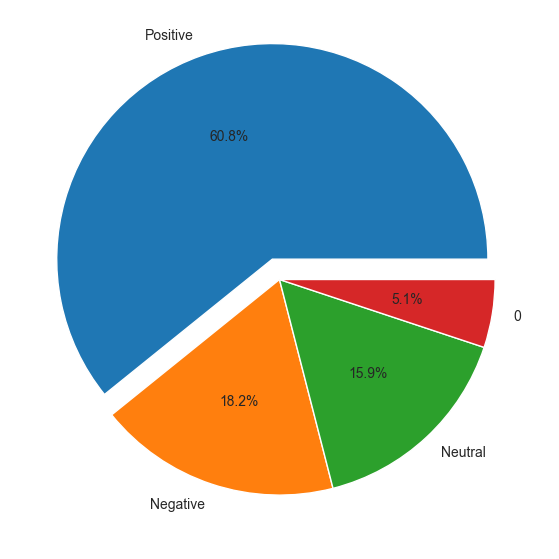

In [59]:
#Plotting the visuals

swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0,0), autopct='%1.1f%%', shadow=False)
# plt.legend()

([<matplotlib.patches.Wedge at 0x22318936af0>,
 [Text(-0.3661261031501898, 1.03728090534438, 'Positive'),
  Text(-0.3466689729899722, -1.0439447414332226, 'Negative'),
  Text(0.9208631508682364, -0.9871732661356991, 'Neutral'),
  Text(1.0859144012206312, -0.1754705480177182, '0')],
 [Text(-0.19970514717283078, 0.5657895847332981, '60.8%'),
  Text(-0.18909216708543936, -0.5694244044181214, '18.2%'),
  Text(0.5798027246207413, -0.621553537937292, '15.9%'),
  Text(0.5923169461203442, -0.09571120800966447, '5.1%')])

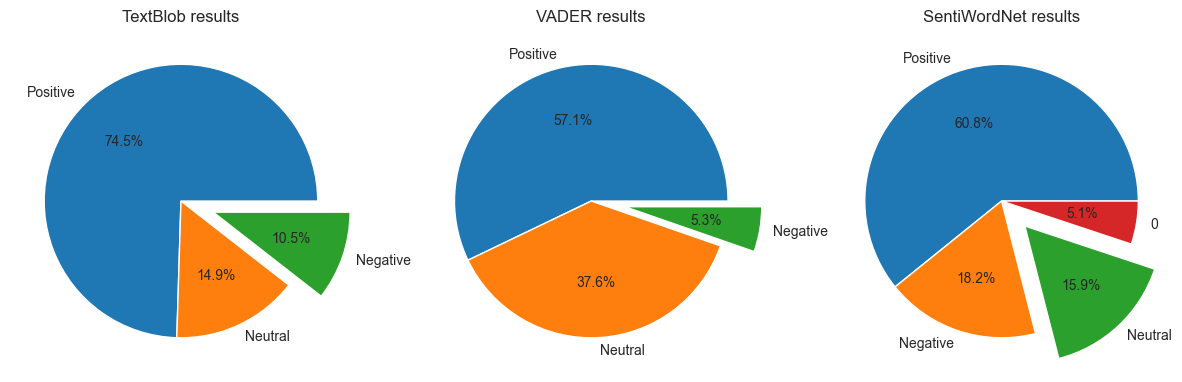

In [60]:
#Visual representation of TextBlob, VADER, SentiWordNet results

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25,0), autopct='%1.1f%%', shadow=False)

In [ ]:
#Sentiment Analysis using machine learning
